In [2]:
#import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import subprocess as cmd

In [3]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/"

In [4]:
file_mean = save_path+"fmap_mean.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [5]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_train = df[(df['exp']==36) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==36) & (df['mini_exp']==6)]

In [7]:
X2_train = df_train.iloc[:, 5:-1].values
y2_train = df_train['theory'].values

X2_test = df_test.iloc[:, 5:-1].values
y2_test = df_test['theory'].values

In [8]:
X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test = y2_test

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


In [3]:
def get_even_num(num=63):
    runs = []
    evens = []
    j = 0
    for i in range(num):
        if (i != 0) & (i != 2):
            if i % 2 == 0:
                evens.append(str(i))
                j += 1
                if j == 5: 
                    runs.append(evens)
                    evens = []
                    j = 0
    return runs

In [37]:
code_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/"
sub_path_36 = code_path+"R21_36_Cyl_Aqueous/"
sub_path_37 =  code_path+"R21_37_Cyl_Aqueous/"
sub_path_38 =  code_path+"R21_38_Cyl_Aqueous/"
# sub_path_01_06 = "/Volumes/BackupPlus/Projects/Parra/R21/NIFTI/R21_SUB01_SES06/"
#cwd_path = sub_path+"/NIFTI/bmaps_numpy/"
tes = [2.46, 4.61, 7.09, 10.5, 15.0, 20.0, 24.5, 29.0, 33.5, 38.0, 42.5, 47.0]

base_runs = get_even_num()
bp = [['6','4'],['10','4'],['6','10']],[['16','14'],['20','14'],['16','20']],[['26','24'],['30','24'],['26','30']],[['36','34'],['40','34'],['36','40']],[['46','44'],['50','44'],['46','50']],[['56','54'],['60','54'],['56','60']]


In [38]:
base_runs

[['4', '6', '8', '10', '12'],
 ['14', '16', '18', '20', '22'],
 ['24', '26', '28', '30', '32'],
 ['34', '36', '38', '40', '42'],
 ['44', '46', '48', '50', '52'],
 ['54', '56', '58', '60', '62']]

In [39]:
bp

([['6', '4'], ['10', '4'], ['6', '10']],
 [['16', '14'], ['20', '14'], ['16', '20']],
 [['26', '24'], ['30', '24'], ['26', '30']],
 [['36', '34'], ['40', '34'], ['36', '40']],
 [['46', '44'], ['50', '44'], ['46', '50']],
 [['56', '54'], ['60', '54'], ['56', '60']])

## Extract data

In [40]:
def extract_data(sub_path, experiment):
    print(sub_path)
    cwd_path = sub_path+"/NIFTI/bmaps_numpy/"
    result = pd.DataFrame()
    for m in range(len(base_runs)):   
        tdir = cwd_path+bp[m][0][0]+"minus"+bp[m][0][1]+"/"
        theory_img = nib.load(tdir+"Bvals.nii")
        theory_data = theory_img.get_data()
        sp = theory_data.shape
        b_data = []

        for i in range(sp[0]):
            for j in range(sp[1]):
                for k in range(sp[2]):
                    b_data.append([experiment, i, j, k, m+1, theory_data[i][j][k]])

        b_pd = pd.DataFrame(b_data, columns=['exp', 'i', 'j', 'k', 'miniexp', 'theory'])

        miniexp = pd.DataFrame()
        for n in range(len(base_runs[m])):
            new_data = []  
            bdir = cwd_path+"base_run_"+base_runs[m][n]+"/"
            print(base_runs[m][n])
            fmap_img = nib.load(bdir+"4d_fmap_Mean.nii.gz")
            fmap_data = fmap_img.get_data()
            sp = fmap_data.shape
            
            for i in range(sp[0]):
                for j in range(sp[1]):
                    for k in range(sp[2]):
                        new_data.append([experiment, i, j, k, m+1, fmap_data[i][j][k]])

            col = "mean"+str(n)
            new_pd = pd.DataFrame(new_data, columns=['exp', 'i', 'j', 'k', 'miniexp', col])
            if n == 0:
                miniexp = new_pd
            else:
                miniexp = miniexp.merge(new_pd, on=['exp', 'i', 'j', 'k', 'miniexp'], sort=False)

        miniexp = miniexp.merge(b_pd, on=['exp','i', 'j', 'k', 'miniexp'], sort=False)
        result = result.append(miniexp, ignore_index=True)
    return result

In [41]:
result_36 = extract_data(sub_path_36, '36')
#result_37 = extract_data(sub_path_37, '37')
#result_38 = extract_data(sub_path_38, '38')
#result_01_06= extract_data(sub_path_01_06, '0106')

/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_36_Cyl_Aqueous/
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62


In [42]:
print(result_36.shape)
# print(result_37.shape)
# print(result_38.shape)
#print(result_01_06.shape)

(1081344, 11)


In [28]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/"
np.savetxt(save_path+"fmap_mean_hd.txt", result_36.values, fmt="%s")

# Machine Learning

In [23]:
import sklearn
from platform import python_version

print(python_version())

2.7.18


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [43]:
train = result_36[(result_36['miniexp']!=6)]
test = result_36[(result_36['miniexp']==6)]
X_train = train.iloc[:, 5:-1].values
y_train = train['theory'].values
X_test = test.iloc[:, 5:-1].values
y_test = test['theory'].values
X_test

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [44]:
train.iloc[:, 5:-1]

,mean0,mean1,mean2,mean3,mean4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0


In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


In [207]:
regr10_noijk = MLPRegressor(random_state=1, hidden_layer_sizes = (10,), max_iter=500).fit(X_train_noijk, y_train)

In [239]:
regr10_10_10_noijk = MLPRegressor(random_state=1, hidden_layer_sizes = (10,10,10), max_iter=500).fit(X_train_noijk, y_train)

In [158]:
regr10 = MLPRegressor(random_state=1, hidden_layer_sizes = (10,), max_iter=500).fit(X_train, y_train)

In [161]:
regr5 = MLPRegressor(random_state=1, hidden_layer_sizes = (5,), max_iter=500).fit(X_train, y_train)

In [163]:
regr10_2 = MLPRegressor(random_state=1, hidden_layer_sizes = (10,2), max_iter=500).fit(X_train, y_train)

In [165]:
regr10_10 = MLPRegressor(random_state=1, hidden_layer_sizes = (10,10), max_iter=500).fit(X_train, y_train)

In [12]:
regr10_10_10 = MLPRegressor(random_state=1, hidden_layer_sizes = (10,10,10), max_iter=500).fit(X_train, y_train)

In [18]:
#this is the score before prediction, not sure how it is useful in determining how well the machine learning worked
regr10_10_10.score(X_test,y_test)

0.8093637330303394

In [19]:
np.corrcoef(regr10_10_10.predict(X_test),y_test)

array([[1.       , 0.8998223],
       [0.8998223, 1.       ]])

In [13]:
regr10_10_10.score(X_test,y_test) # python 3

0.7235479854252406

In [14]:
np.corrcoef(regr10_10_10.predict(X_test),y_test)

array([[1.        , 0.85849349],
       [0.85849349, 1.        ]])

In [170]:
header = ["i", "j", "k", "ml_regr_10_10"]
ml_out = sub_path_36+"/ml_out/"
cmd.getoutput("mkdir "+ml_out)
test.to_csv(ml_out+'test10_10.csv', columns = header, index=False, header=False)

In [242]:
header = ["i", "j", "k", "ml_regr_10_10_10_noijk"]
ml_out = sub_path_01_06+"/ml_out/"
cmd.getoutput("mkdir "+ml_out)
testhum.to_csv(ml_out+'testhum10_10_10_noijk.csv', columns = header, index=False, header=False)

In [243]:
cmd.getoutput("3dUndump -prefix "+ml_out+"testhum10_10_10_noijk.nii.gz -master "+sub_path_01_06+"NIFTI/bmaps_numpy/6minus4/4d_fmap_Mean.nii.gz -datum float "+ml_out+'testhum10_10_10_noijk.csv')

'++ 3dUndump: AFNI version=AFNI_18.2.15 (Aug 28 2018) [64-bit]\n++ Starting to fill via -ijk indexes\n++ Total number of voxels filled = 180224\n++ Wrote out dataset /Volumes/BackupPlus/Projects/Parra/R21/NIFTI/R21_SUB01_SES06//ml_out/testhum10_10_10_noijk.nii.gz'

## Compare ML and Physics Model

In [172]:
from scipy import stats
def theorVmeasv2(sub_path, cur, meas, eromeas, title, outfig, erode = "1", xminusy = "base_run_26_28_30_32_34"):
    cwd = sub_path+"NIFTI/bmaps_numpy/"+xminusy+"/"
    #print commands.getoutput("3dcalc -a "+cwd+"/mask.nii.gz -prefix "+cwd+"/mask_erode1.nii.gz -b a+i -c a-i -d a+j -e a-j -f a+k -g a-k -expr 'a*(1-amongst(0,b,c,d,e,f,g))'")
    print(cmd.getoutput("3dmask_tool -input "+cwd+"/mask.nii.gz -prefix "+cwd+"/mask_erode"+erode+".nii.gz -dilate_result -"+erode))
    print(cmd.getoutput("fslmaths "+cwd+"/mask_erode"+erode+".nii.gz -mul "+meas+" "+eromeas))
#    print(cmd.getoutput("3dcalc -a "+cwd+"/mask_erode"+erode+".nii.gz -b "+meas+" -expr '(a*b)' -prefix "+eromeas))
    print(cmd.getoutput("fslmaths "+cwd+"/mask_erode"+erode+".nii.gz -mul "+cwd+"/Bvals.nii "+cwd+"/Bvals_erode"+erode+".nii.gz"))
    img_meas = nib.load(eromeas)
    img_theo = nib.load(cwd+"/Bvals_erode"+erode+".nii.gz")
    
    #img_meas = img_meas.slicer[:,:,15:48]
    #img_theo = img_theo.slicer[:,:,15:48]
    #img_theo = nib.load(cwd+"/diff_fmap_Mean.nii.gz")
    data_meas = img_meas.get_data()
    data_theo = img_theo.get_data()
    x = data_theo.flatten()
    y = data_meas.flatten()
    m, b, r, p, st_er = stats.linregress(x,y) 
    print(r)
    plt.plot(x,y, 'o', markersize = 1)
    yfit = [b + m * xi for xi in x]
    yisx = [0 + 1 * xi for xi in x]
    plt.plot(x, yfit)
    plt.plot(x, yisx)
    if cur == 2:
        plt.axis([0, 150, -150, 150])
    if cur == -2:
        plt.axis([-150,0, -150, 0])
    if cur == -4:
        plt.axis([0,-300,0,-300])
    if cur == 4:
        plt.axis([0,300,0,300])
    plt.xlabel("Theory (nT)", fontsize=16)
    plt.ylabel(title+" (nT)", fontsize=16)
    plt.text(60,100,"r = "+str(round(r,4))+"\nst_err = "+str(round(st_er,4))+" nT\ny = "+str(round(m,4))+"*x + "+str(round(b,4)))
    plt.title('B field from 6cm Loop of Wire', fontsize = 20)
#    plt.show()
#    plt.close()
#    %matplotlib inline
    plt.savefig(sub_path+outfig+"Theo_v_Meas.svg", format="svg")
    plt.savefig(sub_path+outfig+"Theo_v_Meas.png", format="png")

In [173]:
erode = "2"
xminusy = "6minus4"
sub_path=sub_path_36
cwd = sub_path+"NIFTI/bmaps_numpy/"+xminusy+"/"
meas1 = cwd+"/4d_fmap_Mean.nii.gz"
eromeas1=cwd+"/diff_fmap_Mean_erode"+erode+".nii.gz"
title1 = "MRI Physics Model"
outfig1 = "NIFTI/bmaps_numpy/6minus4/"
meas2=sub_path+"/ml_out/test.nii.gz"
eromeas2=sub_path+"/ml_out/test_erode.nii.gz"
title2 = "Machine Learning Model"
outfig2= "ml_out/"
meas3=sub_path+"/NIFTI/bmaps_numpy/base_run_4_6_8_10_12/vol0001.nii.gz"
eromeas3=sub_path+"/NIFTI/bmaps_numpy/base_run_4_6_8_10_12/vol0001_erode.nii.gz"
title3 = "MRI Physics Detrend Model"
outfig3= "NIFTI/bmaps_numpy/base_run_4_6_8_10_12/"
meas4=sub_path+"/ml_out/test10_10.nii.gz"
eromeas4=sub_path+"/ml_out/test10_10_erode.nii.gz"
title4 = "Machine Learning Model_10_10"
outfig4= "ml_out/"

++ no -frac option: defaulting to -union
++ processing 1 input datasets...
++ padding all datasets by 0 (for dilations)
++ frac 0 over 1 volumes gives min count 0
++ voxel limits: 0 clipped, 33992 survived, 146232 were zero
++ writing result mask_erode2.nii.gz...
** ERROR: output dataset name 'mask_erode2.nii.gz' conflicts with existing file
** ERROR: dataset NOT written to disk!


-0.013619591408140895


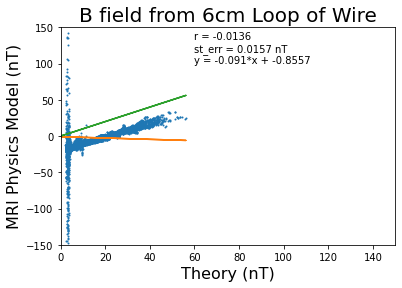

In [125]:
theorVmeasv2(sub_path=sub_path_36, cur = 2, meas=meas1, eromeas=eromeas1, title = title1, outfig=outfig1, erode = "2", xminusy = "6minus4")

++ no -frac option: defaulting to -union
++ processing 1 input datasets...
++ padding all datasets by 0 (for dilations)
++ frac 0 over 1 volumes gives min count 0
++ voxel limits: 0 clipped, 33992 survived, 146232 were zero
++ writing result mask_erode2.nii.gz...
** ERROR: output dataset name 'mask_erode2.nii.gz' conflicts with existing file
** ERROR: dataset NOT written to disk!


0.9873767550028498


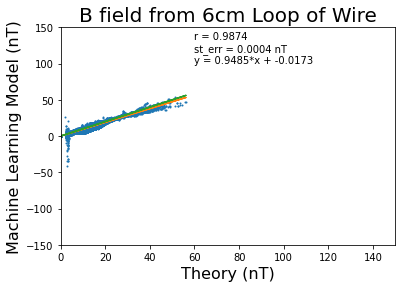

In [126]:
theorVmeasv2(sub_path=sub_path_36, cur = 2, meas=meas2, eromeas=eromeas2, title = title2, outfig=outfig2, erode = "2", xminusy = "6minus4")

++ no -frac option: defaulting to -union
++ processing 1 input datasets...
++ padding all datasets by 0 (for dilations)
++ frac 0 over 1 volumes gives min count 0
++ voxel limits: 0 clipped, 33992 survived, 146232 were zero
++ writing result mask_erode2.nii.gz...
** ERROR: output dataset name 'mask_erode2.nii.gz' conflicts with existing file
** ERROR: dataset NOT written to disk!


0.1940967000711596


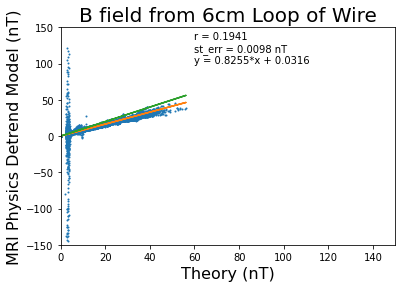

In [144]:
theorVmeasv2(sub_path=sub_path_36, cur = 2, meas=meas3, eromeas=eromeas3, title = title3, outfig=outfig3, erode = "2", xminusy = "6minus4")

++ no -frac option: defaulting to -union
++ processing 1 input datasets...
++ padding all datasets by 0 (for dilations)
++ frac 0 over 1 volumes gives min count 0
++ voxel limits: 0 clipped, 33992 survived, 146232 were zero
++ writing result mask_erode2.nii.gz...
** ERROR: output dataset name 'mask_erode2.nii.gz' conflicts with existing file
** ERROR: dataset NOT written to disk!


0.9930934733934158


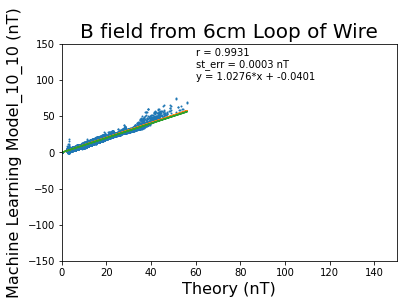

In [174]:
theorVmeasv2(sub_path=sub_path_36, cur = 2, meas=meas4, eromeas=eromeas4, title = title4, outfig=outfig4, erode = "2", xminusy = "6minus4")